# Visualizacion y Analisis de datos

Se hará uso de el dataset NSL-KDD que clasifica varios ejemplos de tráfico de red en anómalos o normales esto en conjunto de un número bastante amplio de características de las que se deberá deternminar cuales son las más útiles y las que mejor correlación poseen con la etiqueta *class* que define si el trafico es anómalo o normal

## 1. Leer el dataset

No leeremos directamente el csv txt puesto que no contiene el nombre de las
columnas de los datos.

En su lugar lo haremos con el archivo .arff que si que contiene varios arreglos entre los que consta el nombre de las columnas y otro con la data

In [1]:
# Instalamos un paquete que permita la lectura de archivos arff
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=13fc99ceb8d2dac25af4c5ea60457cff0fcadccb2be6d45101754d9bdc531057
  Stored in directory: /home/ljmor/.cache/pip/wheels/a9/ac/cf/c2919807a5c623926d217c0a18eb5b457e5c19d242c3b5963a
Successfully built liac-arff


In [8]:
# Lectura para ver la estructura de los datos en el formato arff
import arff

with open('../datasets/NSL-KDD/KDDTrain+.arff', 'r') as train_set:
    df = arff.load(train_set)

df.keys() # Nos interesa los valores de las claves attributes y data

dict_keys(['description', 'relation', 'attributes', 'data'])

In [ ]:
df['data'] # Cada arreglo es un elemnto (trafico de red) con sus respectivos valores

In [12]:
df['attributes'] # Arreglo de claves-valor con el nombre del atributo y como valor un arreglo con el tipo de valor que puede tener ese atributo

[('duration', 'REAL'),
 ('protocol_type', ['tcp', 'udp', 'icmp']),
 ('service',
  ['aol',
   'auth',
   'bgp',
   'courier',
   'csnet_ns',
   'ctf',
   'daytime',
   'discard',
   'domain',
   'domain_u',
   'echo',
   'eco_i',
   'ecr_i',
   'efs',
   'exec',
   'finger',
   'ftp',
   'ftp_data',
   'gopher',
   'harvest',
   'hostnames',
   'http',
   'http_2784',
   'http_443',
   'http_8001',
   'imap4',
   'IRC',
   'iso_tsap',
   'klogin',
   'kshell',
   'ldap',
   'link',
   'login',
   'mtp',
   'name',
   'netbios_dgm',
   'netbios_ns',
   'netbios_ssn',
   'netstat',
   'nnsp',
   'nntp',
   'ntp_u',
   'other',
   'pm_dump',
   'pop_2',
   'pop_3',
   'printer',
   'private',
   'red_i',
   'remote_job',
   'rje',
   'shell',
   'smtp',
   'sql_net',
   'ssh',
   'sunrpc',
   'supdup',
   'systat',
   'telnet',
   'tftp_u',
   'tim_i',
   'time',
   'urh_i',
   'urp_i',
   'uucp',
   'uucp_path',
   'vmnet',
   'whois',
   'X11',
   'Z39_50']),
 ('flag',
  ['OTH',
   'REJ'

In [13]:
# Parsear los atributos para obtener unicamente el nombre de los mismos
atts = [attr[0] for attr in df['attributes']]
atts

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'class']

In [15]:
# Fusionar la data con sus columnas en un DF de Pandas
import pandas as pd

df = pd.DataFrame( df['data'], columns=atts )
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,30.0,32.0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,184.0,25.0,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255.0,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8.0,udp,private,SF,105.0,145.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0.0,tcp,smtp,SF,2231.0,384.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0.0,tcp,klogin,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,144.0,8.0,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255.0,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [16]:
# Construimos una funcion para reusar la carga del dataset a un df de Pandas
def load_kdd_dataset(data_path):
    """Lectura del conjunto de datos NSL-KDD."""
    with open(data_path, 'r') as train_set:
        dataset = arff.load(train_set)
    attributes = [attr[0] for attr in dataset["attributes"]]
    return pd.DataFrame(dataset["data"], columns=attributes)

In [17]:
load_kdd_dataset('../datasets/NSL-KDD/KDDTrain+.arff')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,30.0,32.0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,184.0,25.0,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255.0,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8.0,udp,private,SF,105.0,145.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0.0,tcp,smtp,SF,2231.0,384.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0.0,tcp,klogin,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,144.0,8.0,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255.0,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


## Funciones básicas para visualizar la data

In [18]:
# Leer y hacer una copia del df para evitar dañar el original
df_org = load_kdd_dataset('../datasets/NSL-KDD/KDDTrain+.arff')
df = df_org.copy()

In [19]:
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,30.0,32.0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0.0,tcp,private,REJ,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,121.0,19.0,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255.0,19.0,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,166.0,9.0,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255.0,9.0,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,117.0,16.0,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255.0,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0.0,tcp,remote_job,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,270.0,23.0,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255.0,23.0,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,133.0,8.0,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255.0,13.0,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [20]:
# Informacion basica del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

In [21]:
# Mostrar información estadística sobre el conjunto de datos
df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# Mostrar los valores únicos que tiene un atributo determinado
df["protocol_type"].value_counts()

protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

In [24]:
df['class'].value_counts() # Valor etiqueta

class
normal     67343
anomaly    58630
Name: count, dtype: int64

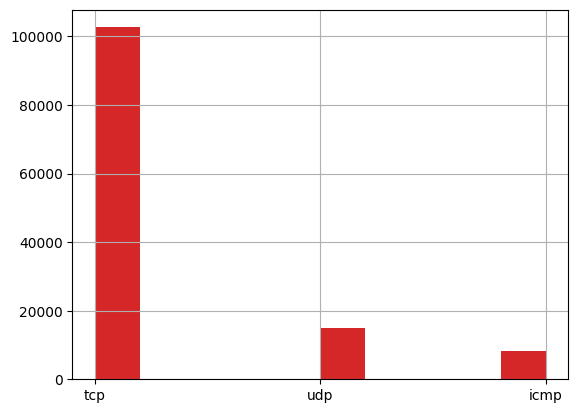

In [28]:
# Mostrar los valores de la característica como un histograma
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df["protocol_type"])
plt.show()

## Encontrar correlaciones

A la hora de entrenar un modelo se debe buscar el menor numero de características de entrada y aquellas que sean más representativas con respecto a la etiqueta, esto para evitar que el algoritmo se vuelva muy complejo y tenga que hacer una carga computacional muy grande.

Para resolver esto buscaremos los atributos con mayor correlación con respecto a la etiqueta *class* y seleccionaresmos únicamente aquellos cuye correlación con la etiqueta sean las más elevadas.

In [29]:
# Actualmente la etiqueta class muestra valores categóricos (string)
df['class']

0          normal
1          normal
2         anomaly
3          normal
4          normal
           ...   
125968    anomaly
125969     normal
125970     normal
125971    anomaly
125972     normal
Name: class, Length: 125973, dtype: object

In [32]:
# Dado que los algoritmos de IA solo pueden trabajar con valores numéricos
# tendrémos que transformar los valores categóricos en numéricos
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['class'] = labelencoder.fit_transform(df['class'])
df['class'] # 1 para normal 0 para anómalo

0         1
1         1
2         0
3         1
4         1
         ..
125968    0
125969    1
125970    1
125971    0
125972    1
Name: class, Length: 125973, dtype: int64

In [36]:
# Hacemos lo mismo con las caracteristicas de entrada con valores categóricos (string) a numéricos
df["protocol_type"] = labelencoder.fit_transform(df["protocol_type"])
df["service"] = labelencoder.fit_transform(df["service"])
df["flag"] = labelencoder.fit_transform(df["flag"])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,20,9,491.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0.0,2,44,9,146.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0.0,1,24,9,232.0,8153.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0.0,1,24,9,199.0,420.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,30.0,32.0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,184.0,25.0,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255.0,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125969,8.0,2,49,9,105.0,145.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125970,0.0,1,54,9,2231.0,384.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125971,0.0,1,30,5,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,144.0,8.0,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255.0,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


Aqui podemos ver que los atributos con mayor correlacion son:
```
same_srv_rate                  0.751913
dst_host_srv_count             0.722535
dst_host_same_srv_rate         0.693803
logged_in                      0.690171
flag                           0.647073
protocol_type                  0.281355
srv_diff_host_rate             0.119377
```

El resto se pueden desechar puesto que no representan ningun valor importante que pueda ser usado por el algoritmo

In [37]:
# Mostrar la correlacion entre las caracteristicas de entrada y la etiqueta
corr_mtrx = df.corr()
corr_mtrx['class'].sort_values( ascending=False )

class                          1.000000
same_srv_rate                  0.751913
dst_host_srv_count             0.722535
dst_host_same_srv_rate         0.693803
logged_in                      0.690171
flag                           0.647073
protocol_type                  0.281355
srv_diff_host_rate             0.119377
is_guest_login                 0.039279
num_access_files               0.036701
su_attempted                   0.022448
num_file_creations             0.021271
root_shell                     0.020285
hot                            0.013083
num_root                       0.011452
num_compromised                0.010198
num_shells                     0.009472
num_failed_logins              0.003755
urgent                         0.002787
is_host_login                  0.002629
srv_count                     -0.000771
dst_bytes                     -0.004118
src_bytes                     -0.005921
land                          -0.007191
duration                      -0.048785


In [38]:
# Mostrar correlación lineal entre todos los atributos del conjunto de datos
df.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
duration,1.000000,0.038241,0.092858,-0.063390,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,0.052791,0.087183,0.045519,0.099116,-0.001593,0.070420,NaN,-0.000258,0.000440,-0.079042,-0.039470,-0.069873,-0.069510,0.200682,0.199961,0.074681,-0.013738,-0.040158,0.050570,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024,-0.048785
protocol_type,0.038241,1.000000,0.029994,0.093668,-0.000974,-0.000608,-0.001757,0.169535,-0.000965,-0.011857,-0.003370,-0.100920,-0.001455,-0.004571,-0.003047,-0.001545,-0.003265,-0.002321,-0.005141,NaN,-0.000351,-0.012163,-0.057612,0.037329,-0.076609,-0.078805,-0.046544,-0.046694,0.045951,0.014730,-0.236570,0.236140,0.103919,0.001702,0.131380,-0.209105,-0.356183,-0.079398,-0.077925,-0.015434,-0.046938,0.281355
service,0.092858,0.029994,1.000000,-0.304014,-0.001631,0.003596,-0.009952,0.084404,0.010980,-0.064066,0.033043,-0.139427,0.019798,0.033258,0.042949,0.020174,0.040816,0.002545,0.030100,NaN,0.004959,-0.072743,0.099260,-0.260927,0.276232,0.273346,0.147839,0.147034,-0.369536,0.209917,-0.090172,0.192857,-0.407696,-0.452696,0.284072,-0.111163,-0.156211,0.281635,0.277594,0.150666,0.148405,-0.276548
flag,-0.063390,0.093668,-0.304014,1.000000,-0.008114,-0.004096,-0.010373,0.067214,0.005811,0.068437,-0.006063,0.589363,0.007204,0.022046,0.012014,0.007713,0.015657,0.013978,0.029476,NaN,0.002116,0.070751,-0.470721,0.197178,-0.451584,-0.446915,-0.739250,-0.739957,0.717127,-0.295861,0.213114,-0.316752,0.582687,0.630118,-0.283607,0.195689,0.073773,-0.443441,-0.443225,-0.683310,-0.718778,0.647073
src_bytes,0.070737,-0.000974,-0.001631,-0.008114,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,-0.000272,-0.000186,-0.000093,-0.000179,-0.000134,-0.000309,NaN,-0.000022,-0.000742,-0.005152,-0.002792,-0.003228,-0.003438,0.013782,0.013975,0.003899,-0.000432,-0.002608,-0.005791,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.005921
dst_bytes,0.034878,-0.000608,0.003596,-0.004096,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,0.001069,0.001133,0.001229,0.000089,-0.000083,0.000339,NaN,-0.000008,-0.000421,-0.003543,-0.001754,-0.003059,-0.003038,0.011176,0.011052,0.003788,-0.001703,-0.001674,0.002528,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.004118
land,-0.001553,-0.001757,-0.009952,-0.010373,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,-0.000516,-0.000344,-0.000174,-0.000369,-0.000262,-0.000581,NaN,-0.000040,-0.001374,-0.009837,-0.005031,0.021734,0.022614,-0.004096,-0.005275,0.008739,-0.001551,0.038102,-0.025499,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.007191
wrong_fragment,-0.009866,0.169535,0.084404,0.067214,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,-0.003280,-0.002187,-0.001108,-0.002343,-0.001665,-0.003689,NaN,-0.000252,-0.008728,-0.020819,0.024457,-0.043316,-0.056549,-0.033052,-0.033507,0.054759,-0.026638,-0.026247,0.041056,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682,-0.095905
urgent,0.003830,-0.000965,0.010980,0.005811,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,0.075199

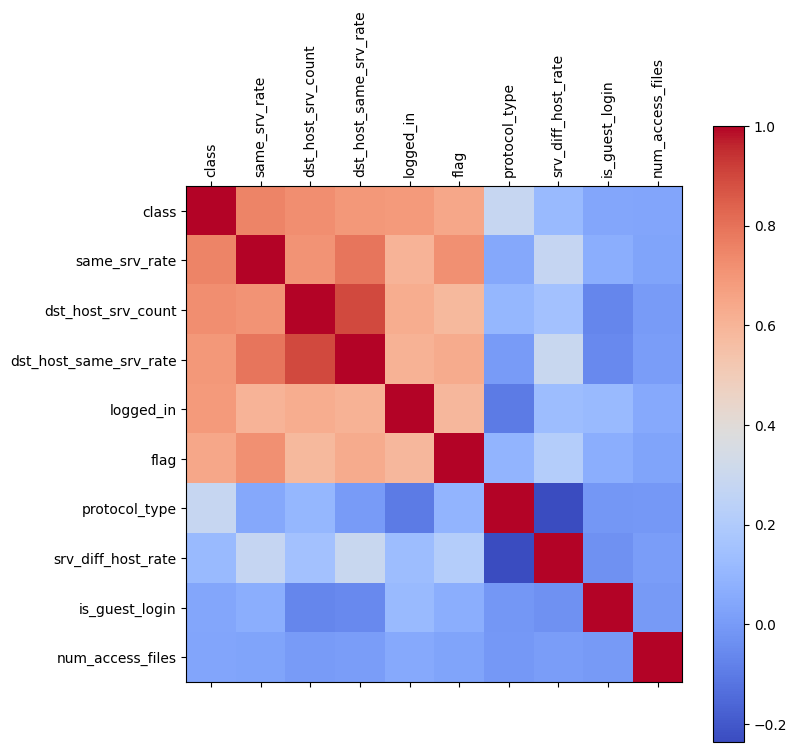

In [44]:
# Gráfico de correlación entre los 10 primeros atributos
import matplotlib.pyplot as plt

# Lista de columnas que te interesan
cols = ['class', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
        'logged_in', 'flag', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files']

# Filtrar el DataFrame para solo incluir esas columnas
filtered_df = df[cols]

# Calcular la matriz de correlación
corr = filtered_df.corr()

# Representar gráficamente la matriz de correlación
fig, ax = plt.subplots(figsize=(8, 8))  # Puedes ajustar el tamaño de la figura según sea necesario
cax = ax.matshow(corr, cmap='coolwarm')  # Puedes cambiar el mapa de colores si lo deseas
fig.colorbar(cax)

# Etiquetas en los ejes
plt.xticks(range(len(cols)), cols, rotation=90)  # Rotación para que las etiquetas no se solapen
plt.yticks(range(len(cols)), cols)

plt.show()
